In [50]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm_drop.xlsx")



In [51]:
data_main

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,0.0,0.260917,0.242424
635,635,0.0,0.260917,0.242424


In [52]:
data

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,NaN,NaN,NaN
635,635,0.0,0.260917,0.242424


In [53]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

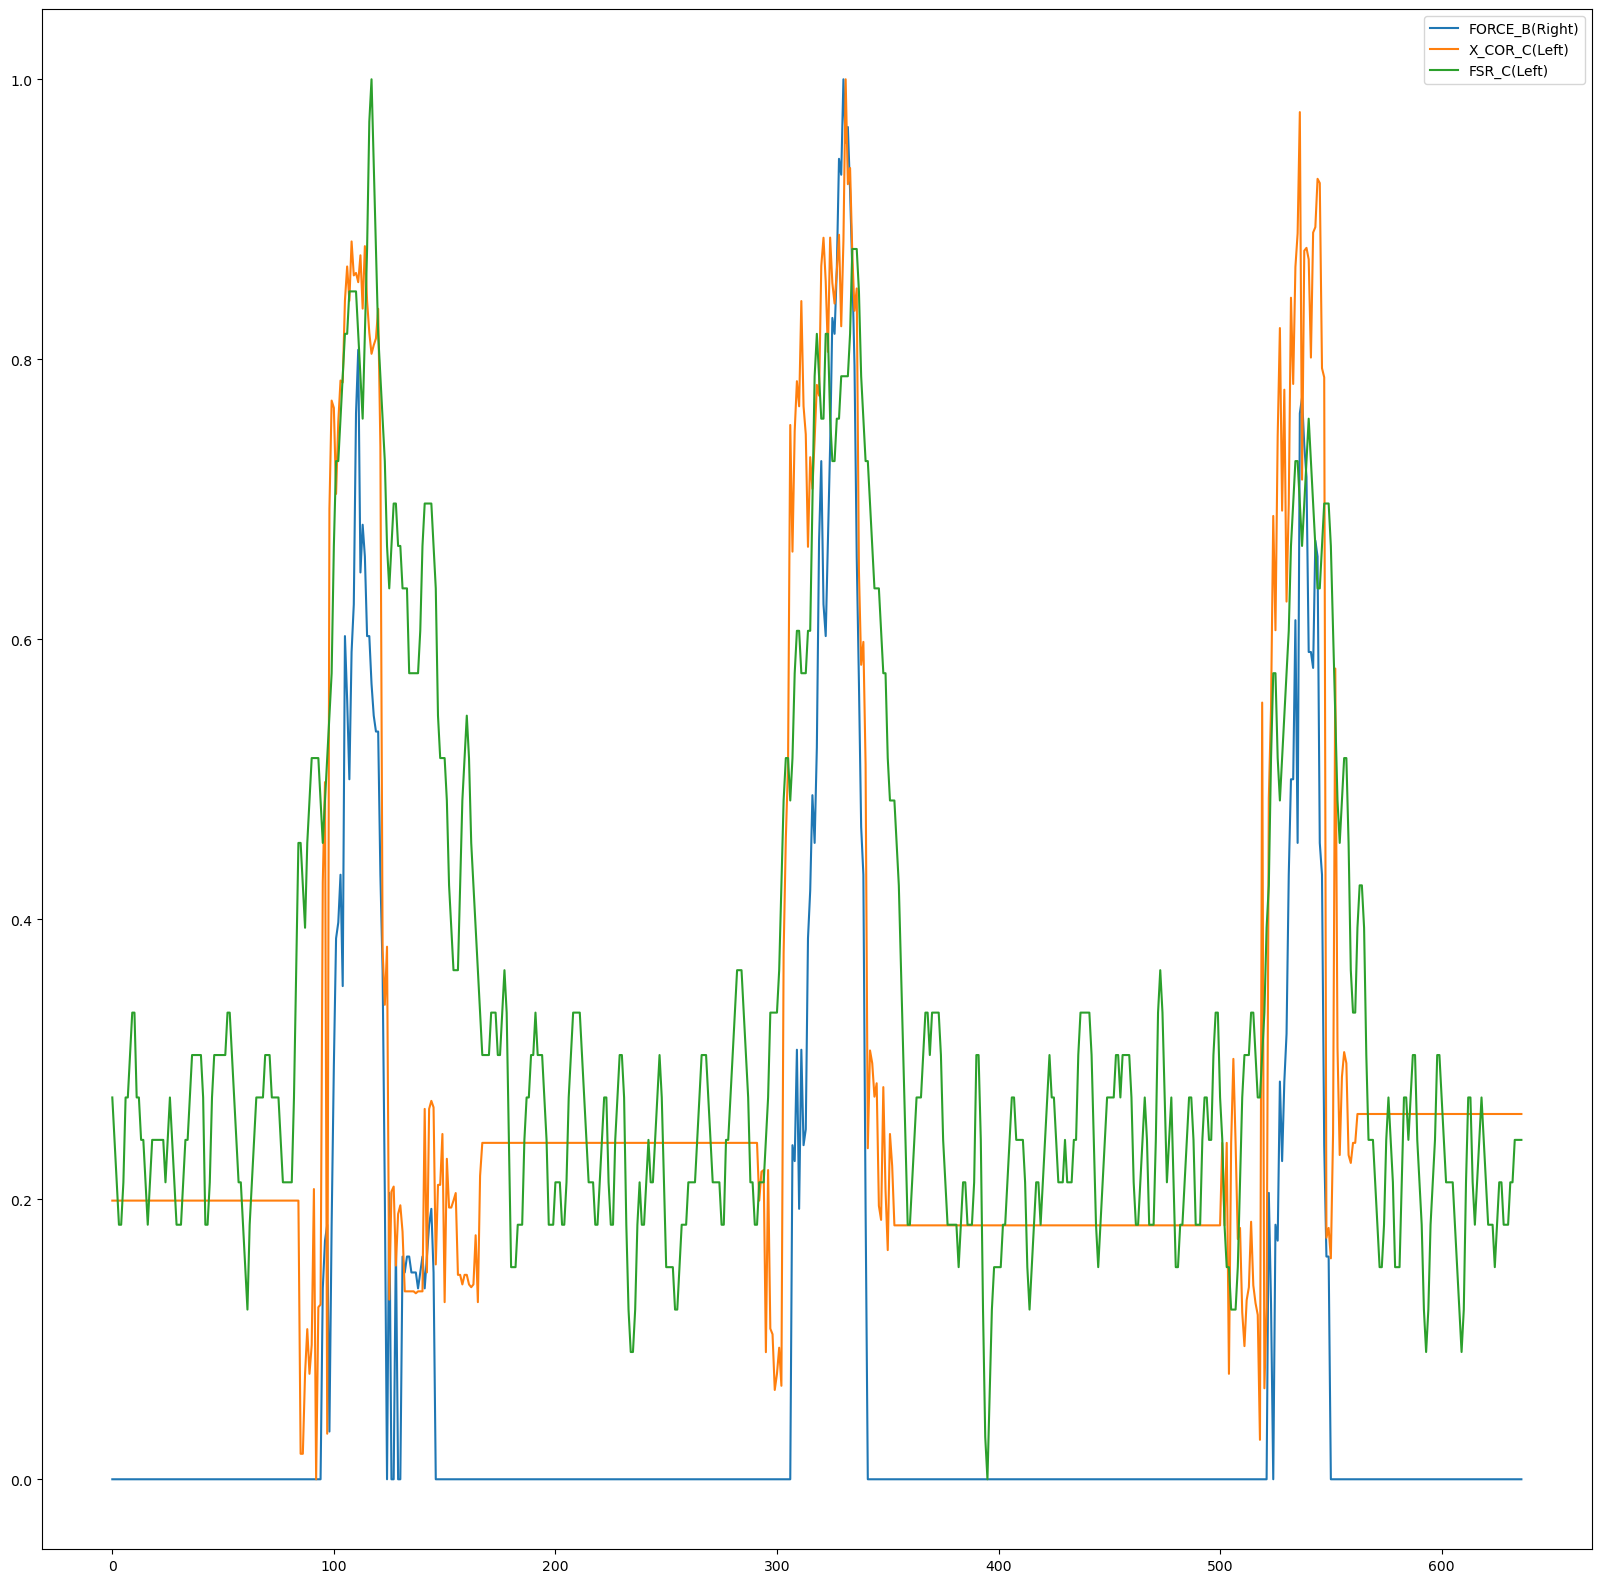

In [54]:
data_main.plot(figsize=(20,20))

<Axes: >

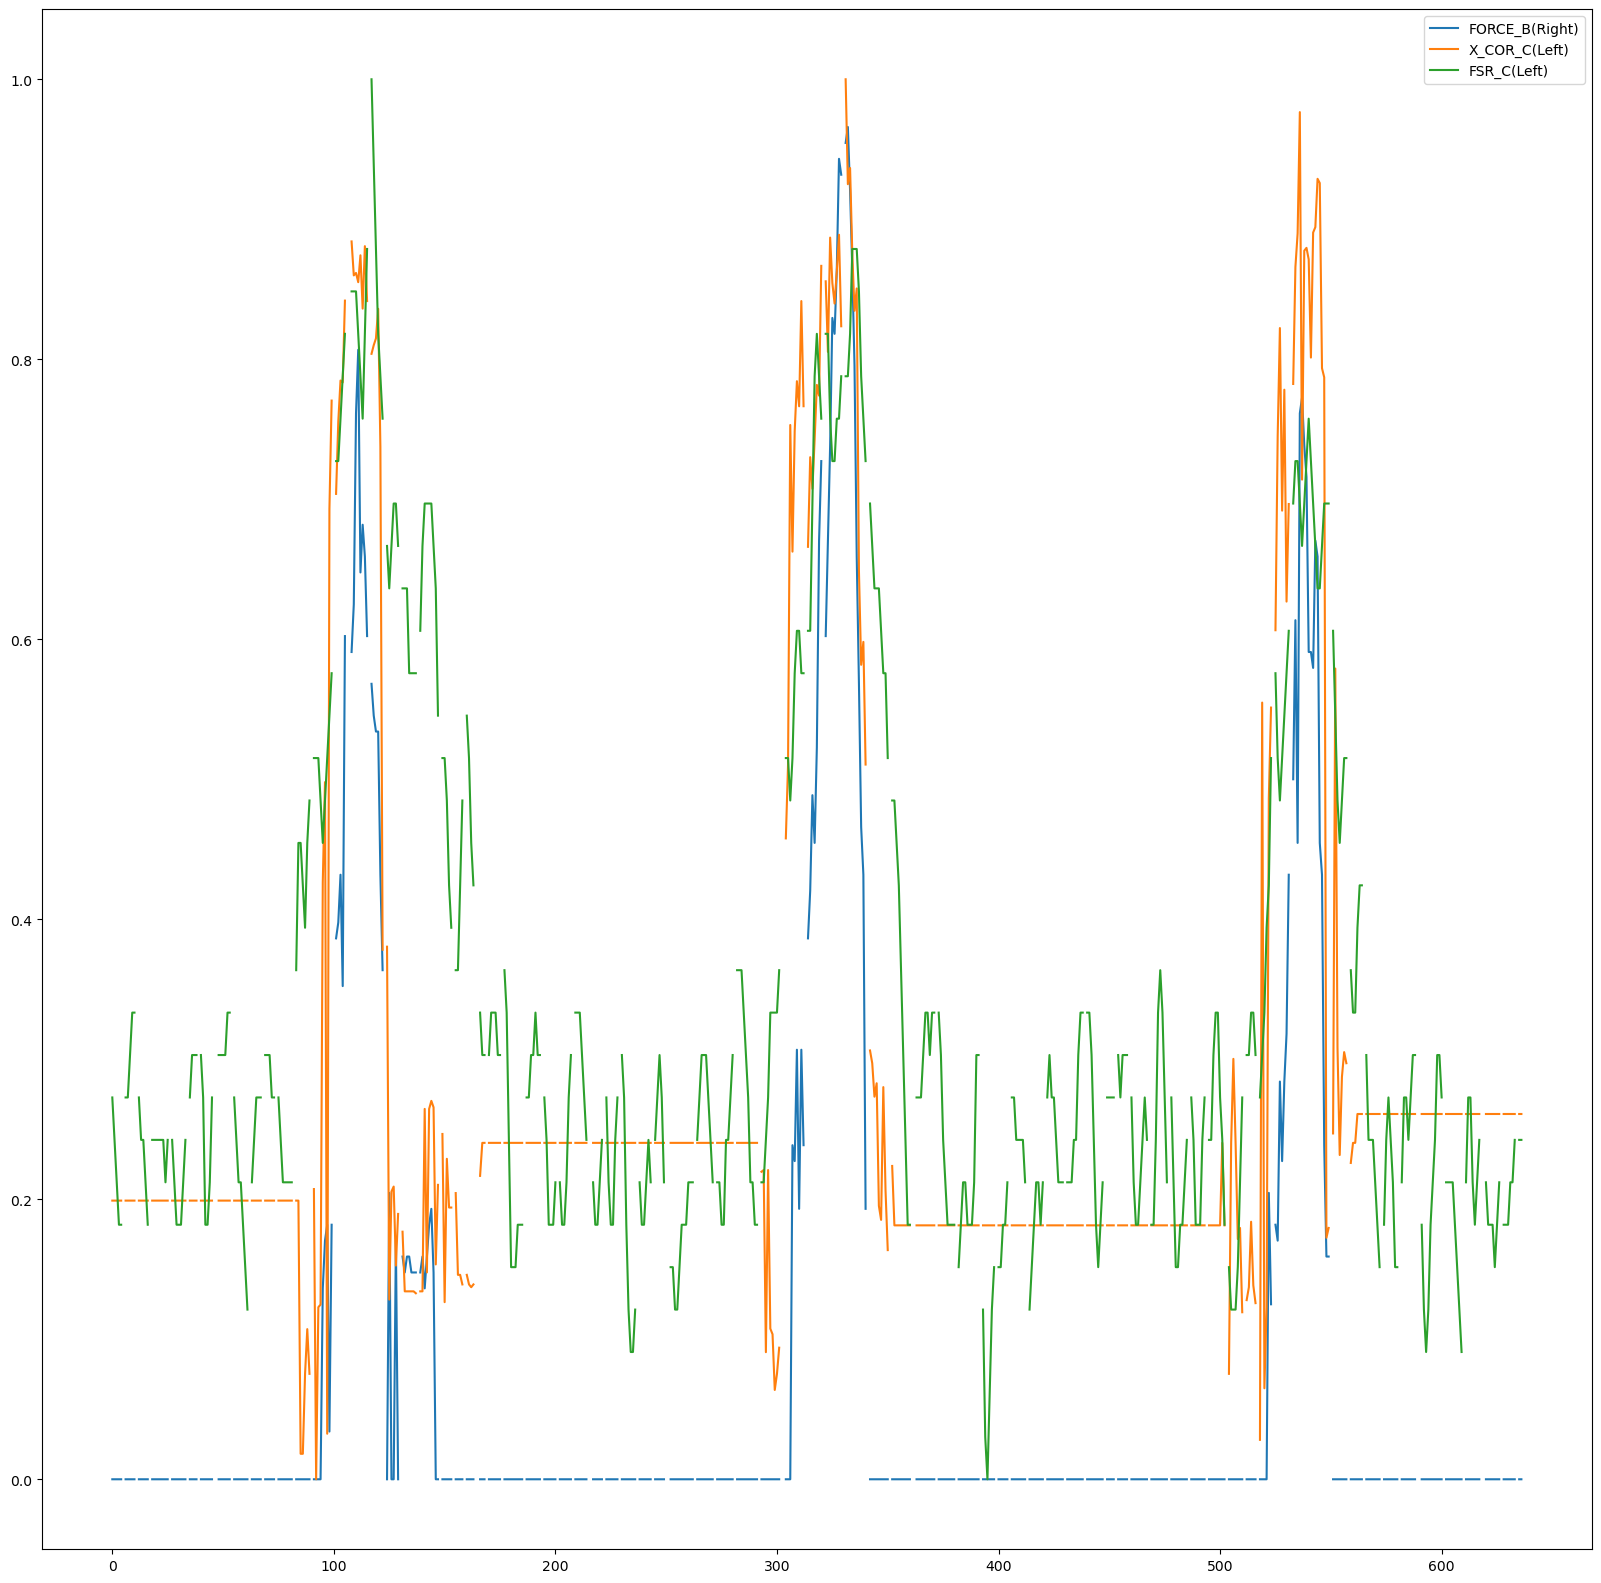

In [55]:
data.plot(figsize=(20,20))

In [56]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    87
X_COR_C(Left)     87
FSR_C(Left)       87
dtype: int64
FORCE_B(Right)    0
X_COR_C(Left)     0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


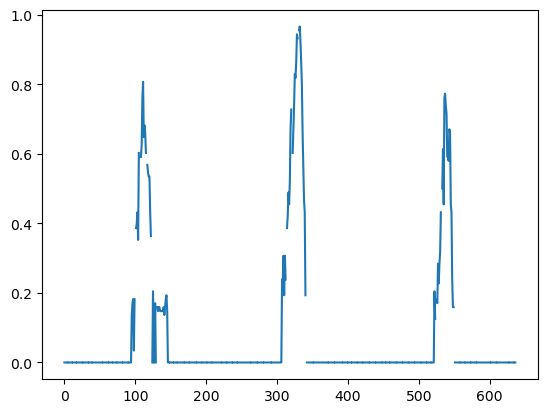

X_COR_C(Left)


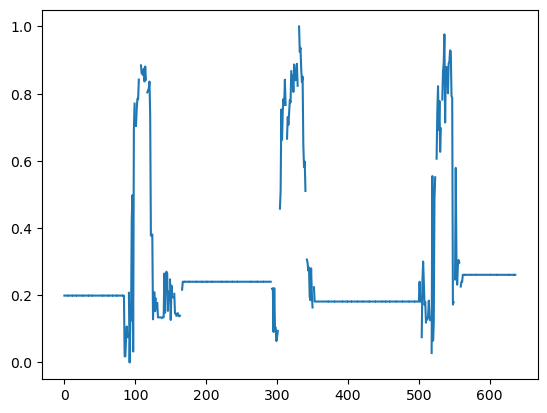

FSR_C(Left)


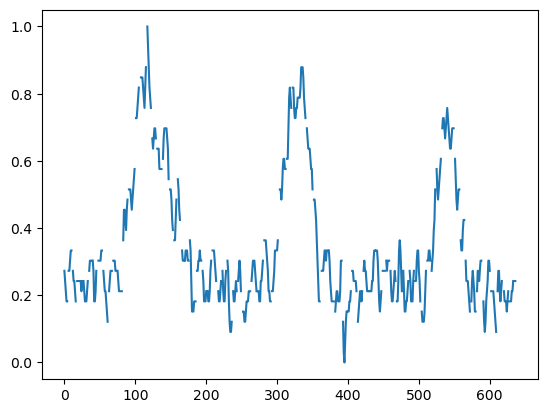

In [57]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [58]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [59]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_data_main.xlsx")





In [60]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)

In [61]:
data_sca.columns

Index(['X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [62]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
scaler.fit_transform(data_sca)






array([[0.19905012, 0.27272727],
       [0.19905012, 0.24242424],
       [0.19905012, 0.21212121],
       ...,
       [0.26091704, 0.24242424],
       [0.26091704, 0.24242424],
       [0.26091704, 0.24242424]])

In [63]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

<Axes: >

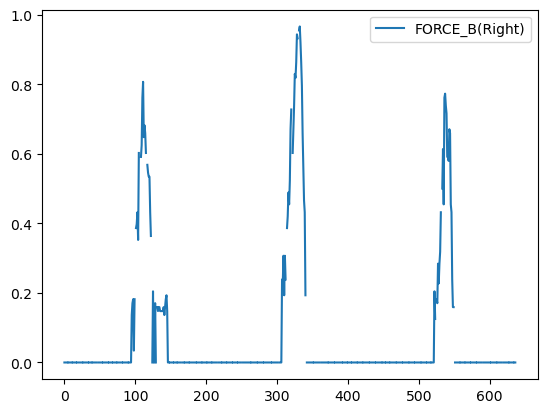

In [64]:
R.plot()

<Axes: >

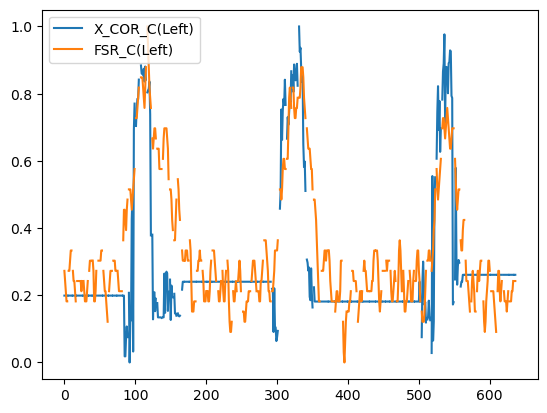

In [65]:
L.plot()

In [66]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [67]:
index=L.index

loss_index_L_XCOR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_XCOR_C=np.setdiff1d(index,loss_index_L_XCOR_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [68]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [69]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_XCOR_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_XCOR_C=loss_index_L_FORCE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FORCE1_C,1]
x_test_L_FSR_C=loss_index_L_FORCE1_C

L_XCOR_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [70]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FSR_C.shape)

(550, 1)
(550,)


In [71]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_XCOR_C=x_test_L_XCOR_C.reshape(x_test_L_XCOR_C.shape[0],x_test_L_XCOR_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [72]:
print(x_test_L_XCOR_C.shape)
print(loss_index_L_XCOR_C.shape)

(87, 1, 1)
(87, 1)


In [73]:
#[I 2023-11-29 13:21:30,114] Trial 14 finished with value: 0.3402831718264951 and parameters: {'batch_size': 98, 'steps_per_epoch': 6, 'epochs': 3907, 'filter': 34, 'lstm_par': 310, 'dense_par': 101}. Best is trial 8 with value: 0.17496336371870166.
#{'batch_size': 127, 'steps_per_epoch': 4, 'epochs': 6513, 'filter': 162, 'lstm_par': 344, 'dense_par': 160}

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(344, return_sequences=True), input_shape=(None,x_train_R_FORCE_B.shape[1])))
model_bilstm.add(TimeDistributed(Dense(160, activation='sigmoid')))
model_bilstm.add(TimeDistributed(Flatten()))
model_bilstm.add(Dense(1))
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam')
model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, None, 688)        952192    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, None, 160)        110240    
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 160)        0         
 tributed)                                                       
                                                                 
 dense_3 (Dense)             (None, None, 1)           161       
                                                                 
Total params: 1,062,593
Trainable params: 1,062,593
Non-trainable params: 0
____________________________________________

2023-11-29 15:35:34.638675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-29 15:35:34.639932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-29 15:35:34.641437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [75]:
model.fit(x_train_R_FORCE_B,y_train_L_XCOR_C,epochs=10000,verbose=2,batch_size=127,steps_per_epoch=4)
pred=model.predict(x_test_L_XCOR_C)
pred=pred.reshape(-1,1)

Epoch 1/10000
4/4 - 0s - loss: 0.0254 - 97ms/epoch - 24ms/step
Epoch 2/10000
4/4 - 0s - loss: 0.0242 - 18ms/epoch - 4ms/step
Epoch 3/10000
4/4 - 0s - loss: 0.0210 - 32ms/epoch - 8ms/step
Epoch 4/10000
4/4 - 0s - loss: 0.0207 - 13ms/epoch - 3ms/step
Epoch 5/10000
4/4 - 0s - loss: 0.0279 - 12ms/epoch - 3ms/step
Epoch 6/10000
4/4 - 0s - loss: 0.0282 - 12ms/epoch - 3ms/step
Epoch 7/10000
4/4 - 0s - loss: 0.0179 - 14ms/epoch - 3ms/step
Epoch 8/10000
4/4 - 0s - loss: 0.0307 - 11ms/epoch - 3ms/step
Epoch 9/10000
4/4 - 0s - loss: 0.0268 - 8ms/epoch - 2ms/step
Epoch 10/10000
4/4 - 0s - loss: 0.0226 - 7ms/epoch - 2ms/step
Epoch 11/10000
4/4 - 0s - loss: 0.0194 - 10ms/epoch - 3ms/step
Epoch 12/10000
4/4 - 0s - loss: 0.0218 - 8ms/epoch - 2ms/step
Epoch 13/10000
4/4 - 0s - loss: 0.0190 - 10ms/epoch - 2ms/step
Epoch 14/10000
4/4 - 0s - loss: 0.0164 - 9ms/epoch - 2ms/step
Epoch 15/10000
4/4 - 0s - loss: 0.0186 - 11ms/epoch - 3ms/step
Epoch 16/10000
4/4 - 0s - loss: 0.0138 - 27ms/epoch - 7ms/step
Epoc

In [76]:
c=0
for i in loss_index_L_XCOR_C:    
    L_XCOR_C[i]=pred[c]
    c+=1

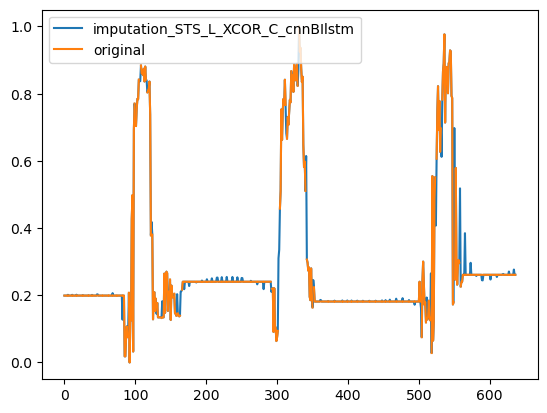

In [77]:
import matplotlib.pyplot as plt 
plt.plot(L_XCOR_C,label='imputation_STS_L_XCOR_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [78]:
#[I 2023-11-29 14:53:03,429] Trial 14 finished with value: 0.3961545312563908 and parameters: {'batch_size': 164, 'steps_per_epoch': 1, 'epochs': 3021, 'filter': 182, 'lstm_par': 315, 'dense_par': 155}. Best is trial 8 with value: 0.05022553164261165.
#{'batch_size': 115, 'steps_per_epoch': 5, 'epochs': 2295, 'filter': 71, 'lstm_par': 319, 'dense_par': 114}


In [79]:
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(319, return_sequences=True), input_shape=(None,x_train_R_FORCE_B.shape[1])))
model_bilstm.add(TimeDistributed(Dense(114, activation='sigmoid')))
model_bilstm.add(TimeDistributed(Flatten()))
model_bilstm.add(Dense(1))
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam')
model_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, None, 638)        819192    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, None, 114)        72846     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 114)        0         
 tributed)                                                       
                                                                 
 dense_5 (Dense)             (None, None, 1)           115       
                                                                 
Total params: 892,153
Trainable params: 892,153
Non-trainable params: 0
________________________________________________

2023-11-29 15:37:28.103111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-29 15:37:28.103797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-29 15:37:28.104244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [80]:
model.fit(x_train_R_FORCE_B,y_train_L_FSR_C,epochs=10000,verbose=2,batch_size=115,steps_per_epoch=5)

Epoch 1/10000
5/5 - 0s - loss: 0.0146 - 19ms/epoch - 4ms/step
Epoch 2/10000


5/5 - 0s - loss: 0.0105 - 14ms/epoch - 3ms/step
Epoch 3/10000
5/5 - 0s - loss: 0.0082 - 15ms/epoch - 3ms/step
Epoch 4/10000
5/5 - 0s - loss: 0.0073 - 15ms/epoch - 3ms/step
Epoch 5/10000
5/5 - 0s - loss: 0.0060 - 18ms/epoch - 4ms/step
Epoch 6/10000
5/5 - 0s - loss: 0.0058 - 13ms/epoch - 3ms/step
Epoch 7/10000
5/5 - 0s - loss: 0.0050 - 14ms/epoch - 3ms/step
Epoch 8/10000
5/5 - 0s - loss: 0.0049 - 13ms/epoch - 3ms/step
Epoch 9/10000
5/5 - 0s - loss: 0.0047 - 14ms/epoch - 3ms/step
Epoch 10/10000
5/5 - 0s - loss: 0.0045 - 16ms/epoch - 3ms/step
Epoch 11/10000
5/5 - 0s - loss: 0.0046 - 13ms/epoch - 3ms/step
Epoch 12/10000
5/5 - 0s - loss: 0.0044 - 14ms/epoch - 3ms/step
Epoch 13/10000
5/5 - 0s - loss: 0.0043 - 13ms/epoch - 3ms/step
Epoch 14/10000
5/5 - 0s - loss: 0.0043 - 12ms/epoch - 2ms/step
Epoch 15/10000
5/5 - 0s - loss: 0.0042 - 13ms/epoch - 3ms/step
Epoch 16/10000
5/5 - 0s - loss: 0.0042 - 11ms/epoch - 2ms/step
Epoch 17/10000
5/5 - 0s - loss: 0.0041 - 11ms/epoch - 2ms/step
Epoch 18/10000

In [81]:
pred=model.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 2ms/step


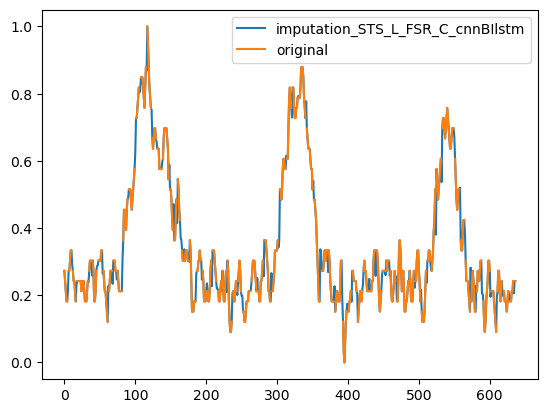

In [82]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    #
plt.plot(L_FSR_C,label='imputation_STS_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [83]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['X_COR_C(Left)'],L_XCOR_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.03559371875290054
0.021647443473965883


In [84]:
L.isnull().sum()

X_COR_C(Left)    87
FSR_C(Left)      87
dtype: int64

In [85]:
for i in loss_index_L_XCOR_C:    
    L['X_COR_C(Left)'][i]=L_XCOR_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

In [86]:
L.isnull().sum()

X_COR_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

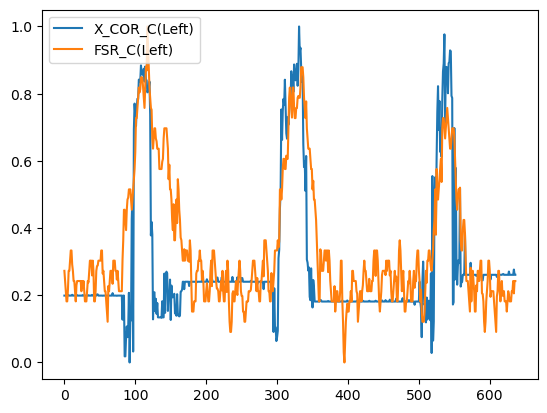

In [87]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

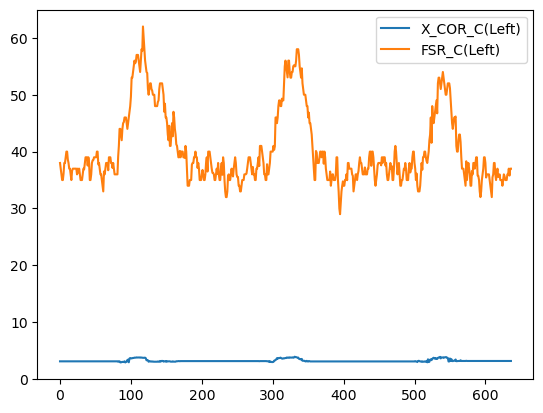

In [88]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()